# Movies Correlation between different features

### Importing all Necesary Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning

In [64]:
# Reading df
df = pd.read_csv("C:/Users/juani/OneDrive/Documentos/Data Anlysis/Movies Analysis/Files/movies.csv")

In [65]:
# Checking the Head
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [66]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [68]:
# Checking if there is missing data
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [69]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [70]:
# Replacing NUM missing values with the column mean

for col in df[['budget', 'gross']]:
    if df[col].isnull().any():
        df[col].fillna(np.mean(df[col]), inplace= True)

C:\Users\juani\AppData\Local\Temp\ipykernel_17308\3446013742.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(np.mean(df[col]), inplace= True)


In [71]:
# Dropping the rest of NA values
df.dropna(axis= 0, inplace= True)

In [72]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [73]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [74]:
# Getting Date time frames in separated columns
date_parts = df["released"].str.split(" ")

# Extracting Date Frames into new columns
df["month"] = date_parts.str[0]
df["day"] = date_parts.str[1].str.split(",").str[0]
df["year"] = date_parts.str[2].str.split("(").str[0]

In [75]:
df.sort_values(by="gross", inplace= False, ascending= False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month,day
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,December,18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,April,26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,December,19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,December,18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,April,27
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0,July,19
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0,June,12
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0,May,4
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0,April,3
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0,November,22


### Data Analysis Time

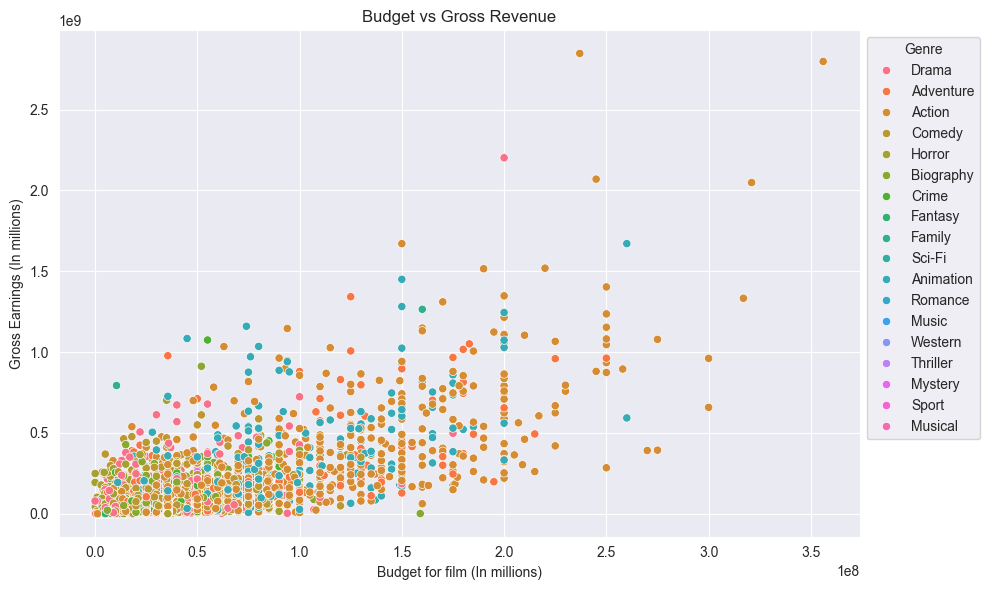

In [76]:
# Scatter Plot

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.scatterplot(df, x= "budget", y= "gross", hue= "genre")
plt.xlabel("Budget for film (In millions)")
plt.ylabel("Gross Earnings (In millions)")
plt.title("Budget vs Gross Revenue")
plt.legend(title= "Genre", bbox_to_anchor= (1, 1), loc= "upper left")
plt.tight_layout()

Text(0.5, 1.0, 'Relation')

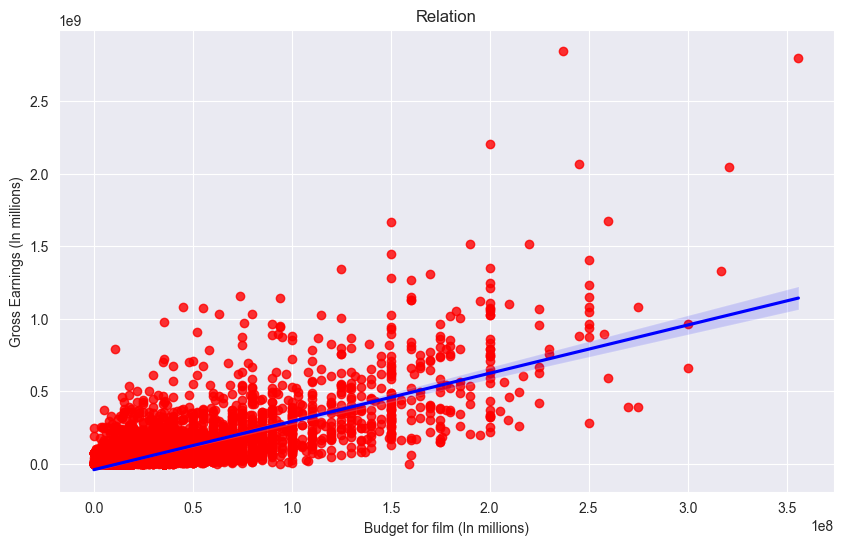

In [77]:
# Regression Plot

plt.figure(figsize=(10,6))
sns.regplot(df, x= "budget", y= "gross", scatter_kws= {"color":"red"}, line_kws= {"color":"blue"})
plt.xlabel("Budget for film (In millions)")
plt.ylabel("Gross Earnings (In millions)")
plt.title("Relation")

Text(50.722222222222214, 0.5, 'Movie Features')

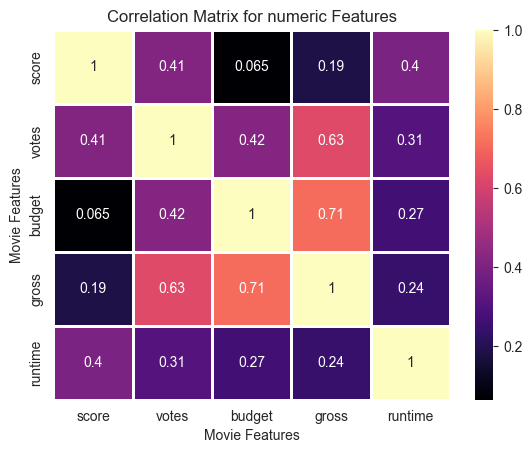

In [58]:
# Lets find any strong correlation

sns.heatmap(df.corr(numeric_only= True), linecolor= "white", linewidth= 1, cmap= "magma", annot= True)
plt.title("Correlation Matrix for numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [81]:
# Want to add the company field to see if there is any correlation

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month,day
0,6506,6,6,1,1685,8.4,927000.0,2544,3958,1022,54,19000000.0,46998772.0,2273,146.0,14,9
1,5498,6,1,1,1472,5.8,65000.0,2233,1612,316,55,4500000.0,58853106.0,710,104.0,13,28
2,5073,4,0,1,1751,8.7,1200000.0,1093,2534,1708,55,18000000.0,538375067.0,1505,124.0,14,29
3,282,4,4,1,1472,7.7,221000.0,1279,1975,2197,55,3500000.0,83453539.0,1769,88.0,13,28
4,1016,6,4,1,1523,7.3,108000.0,1037,511,398,55,6000000.0,39846344.0,1736,98.0,13,36


Text(120.72222222222221, 0.5, 'Movie Features')

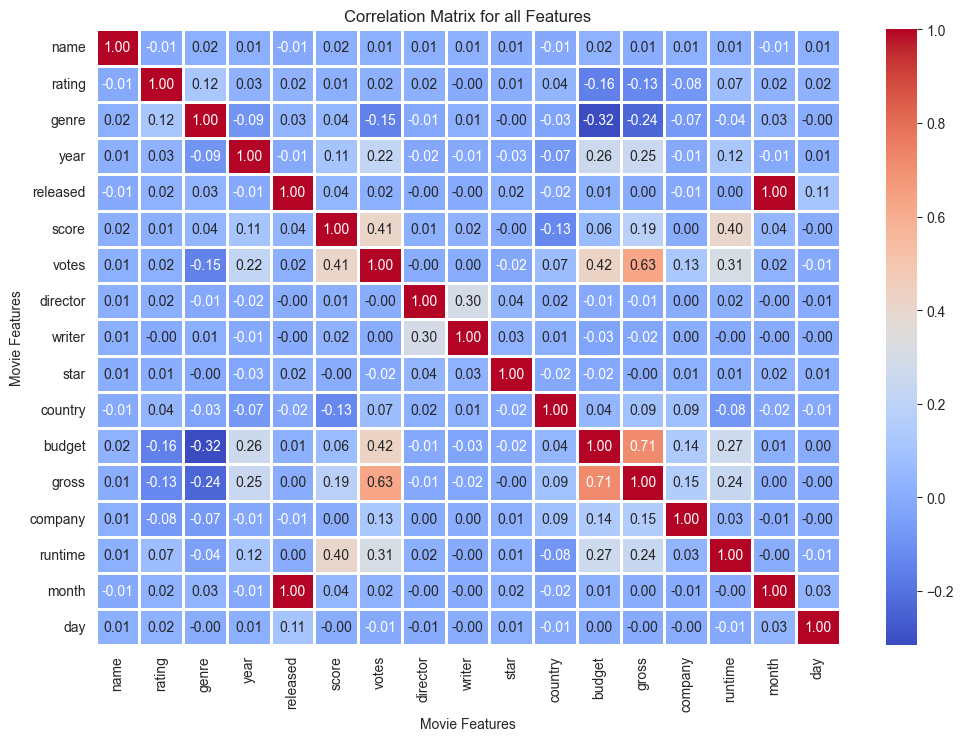

In [99]:
plt.figure(figsize= (12,8))
sns.heatmap(df_numerized.corr(numeric_only= True), linecolor= "white", linewidth= 1, cmap= "coolwarm", annot= True, fmt= ".2f")
plt.title("Correlation Matrix for all Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [135]:
# Creating new Data Frame with all Correlations
corr_df = pd.DataFrame(df_numerized.corr().unstack().sort_values(ascending=False), columns=["Correlations"])
corr_df.index.names = ['Feature 1', 'Feature 2']


In [139]:
# Filterring High corr values
high_corr = corr_df[corr_df["Correlations"] > 0.5]

In [141]:
high_corr

,,Correlations
Feature 1,Feature 2,
day,day,1.000000
month,month,1.000000
rating,rating,1.000000
runtime,runtime,1.000000
company,company,1.000000
gross,gross,1.000000
budget,budget,1.000000
country,country,1.000000
star,star,1.000000


In [142]:
# Votes and Budget have the highest correlation to Gross Earnings